# Plotly

## Data Visualziation

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [16]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('../00_datasets/diamonds.csv')
print(df.shape)
df = df.sample(frac=0.1, random_state=10) # 10% of data
print(df.shape)

(53940, 10)
(5394, 10)


In [67]:
df.head()

carat        cut color clarity  depth  table  price     x     y     z
8018    1.01    Premium     E     SI1   61.7   56.0   4330  6.44  6.39  3.96
1583    0.70  Very Good     D     VS1   60.4   58.0   3008  5.71  5.78  3.47
9138    1.13  Very Good     H     SI2   59.8   59.0   4537  6.75  6.82  4.06
2787    0.76      Ideal     F     VS2   61.0   55.0   3257  5.89  5.92  3.60
52429   0.70    Premium     I    VVS1   61.2   59.0   2513  5.65  5.69  3.47

In [68]:
# reindex the data
df.reset_index(drop=True, inplace=True)

In [69]:
df.head()

carat        cut color clarity  depth  table  price     x     y     z
0   1.01    Premium     E     SI1   61.7   56.0   4330  6.44  6.39  3.96
1   0.70  Very Good     D     VS1   60.4   58.0   3008  5.71  5.78  3.47
2   1.13  Very Good     H     SI2   59.8   59.0   4537  6.75  6.82  4.06
3   0.76      Ideal     F     VS2   61.0   55.0   3257  5.89  5.92  3.60
4   0.70    Premium     I    VVS1   61.2   59.0   2513  5.65  5.69  3.47

In [70]:
# scatter plot
fig = px.scatter(df, x='carat', y='price')
fig.show()

In [71]:
# line plot
fig = px.line(df, x='carat', y='price')
fig.show()

In [ ]:
# scatter plot
fig = px.scatter(df, x='carat', y='price', color='cut')
fig.show()

In [ ]:
# scatter plot
fig = px.scatter(df, x='carat', y='price', color='cut',
                title='Diamond Price vs Carat Weight',
                )
fig.show()

In [ ]:
# scatter plot
fig = px.scatter(df, x='carat', y='price', color='cut',
                title='Diamond Price vs Carat Weight',
                labels={'carat':'Carat Weight', 'price':'Price ($)'}
                )
fig.show()

In [ ]:
# Plot a line chart (example: mean price by carat)
df_mean = df.groupby('carat')['price'].mean().reset_index()
df_mean.head()
fig = px.line(df_mean, x='carat', y='price', 
            title='Mean Price by Carat')
fig.show()

In [ ]:
# Plot a line chart (example: mean price by carat)
df_mean = df.groupby('carat')['price'].mean().reset_index()
df_mean.head()
fig = px.line(df_mean, x='carat', y='price', 
              title='Mean Price by Carat')
fig.show()

<Axes: xlabel='cut', ylabel='price'>

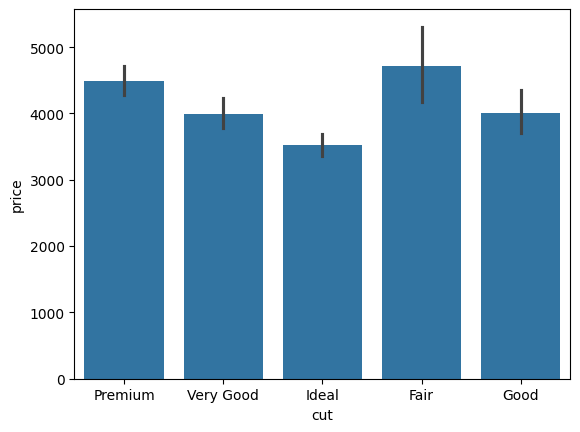

In [ ]:
sns.barplot(x='cut', y='price', data=df)

In [ ]:
# Bar plot for average price per cut category
fig = px.bar(df, x='cut', y='price', 
            title='Average Price by Cut', color='cut')
fig.show()

In [ ]:
df_stats = df.groupby('clarity')['price'].agg(['mean', 'std']).reset_index()
df_stats.head()

# Bar plot for average price per cut category
fig = px.bar(df_stats, x='clarity', y='mean', error_y='std', 
            title='Average Price by Cut', color='clarity')
fig.show()

In [ ]:
# histogram
fig = px.histogram(df, x='price', nbins=50,  
                title='Price Distribution')
fig.show()

In [ ]:
# histogram
fig = px.histogram(df, x='price', nbins=50, color='cut', 
                title='Price Distribution')
fig.show()

In [ ]:
# density contour plot
fig = px.density_contour(df, x='carat', y='price', 
                        title='Density Contour Plot')
fig.show()

In [ ]:
# box plot
fig = px.box(df, x='cut', y='price', 
             title='Price Distribution by Cut')
fig.show()

In [ ]:
# box plot
fig = px.box(df, x='cut', y='price',
            # outliers
            points='suspectedoutliers', # 'outliers', 'suspectedoutliers'
            title='Price Distribution by Cut')
fig.show()

In [ ]:
# box plot
fig = px.box(df, x='cut', y='price', color='clarity',
            # outliers
            points='suspectedoutliers', # 'outliers', 'suspectedoutliers'
            title='Price Distribution by Cut',
            labels={'price':'Price ($)', 'cut':'Cut', 'clarity':'Clarity'}
            )
fig.show()

In [ ]:
# violin plot
fig = px.violin(df, x='cut', y='price', 
                # color='clarity',
        # outliers
        points='suspectedoutliers', # 'outliers', 'suspectedoutliers'
        title='Price Distribution by Cut',
        labels={'price':'Price ($)', 'cut':'Cut', 
                # 'clarity':'Clarity'
                }
        )
fig.show()

In [ ]:
# facet scatter plot by clarity
fig = px.scatter(df, x='carat', y='price', 
                color='cut', 
                facet_col='clarity',
                title='Price vs Carat by Cut and Clarity',)
fig.show()

In [ ]:
# facet scatter plot by clarity
fig = px.scatter(df, x='carat', y='price', 
                color='cut', 
                size='price',
                facet_col='clarity',
                # animate by cut
                animation_frame='cut', 
                title='Price vs Carat by Cut and Clarity',)
fig.show()

In [ ]:
# Density heatmap of carat and price
fig = px.density_heatmap(df, x='carat', y='price', 
                         title='Density Heatmap of Carat vs Price')
fig.show()

## Subplots

In [ ]:
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Carat vs Price', 
                                    'Density Heatmap of Carat vs Price'))

# Scatter plot of carat vs price
scatter = px.scatter(df, x='carat', y='price').data[0]
fig.add_trace(scatter, row=1, col=1)

# Density heatmap of carat vs price
heatmap = px.density_heatmap(df, x='carat', y='price').data[0]
fig.add_trace(heatmap, row=1, col=2)

# Update layout
fig.update_layout(title_text='Carat vs Price and Density Heatmap of Carat vs Price')
fig.show()

In [ ]:
# creat heatmap of correlation matrix of only numerical columns
corr = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
corr

carat     depth     table     price         x         y         z
carat  1.000000  0.025077  0.167961  0.921045  0.977872  0.977024  0.847328
depth  0.025077  1.000000 -0.290898 -0.008800 -0.025174 -0.028279  0.086228
table  0.167961 -0.290898  1.000000  0.116569  0.180099  0.173648  0.113192
price  0.921045 -0.008800  0.116569  1.000000  0.887243  0.889251  0.765929
x      0.977872 -0.025174  0.180099  0.887243  1.000000  0.998270  0.861521
y      0.977024 -0.028279  0.173648  0.889251  0.998270  1.000000  0.861205
z      0.847328  0.086228  0.113192  0.765929  0.861521  0.861205  1.000000

In [ ]:
# creat heatmap of correlation matrix of only numerical columns
corr = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
fig = go.Figure(data=go.Heatmap(x=corr.index.values, 
                                y=corr.columns.values, 
                                z=corr.values, 
                                colorscale='Blackbody')) 
# colorscale can be 'Viridis', 'Cividis', 'Blues', 'Greens', 'Reds', 'Oranges', 'YlOrRd', 'YlGnBu', 'RdBu', 'Picnic', 'Rainbow', 'Portland', 'Jet', 'Hot', 'Blackbody', 'Earth', 'Electric', 'Plasma', 'Magma', 'Inferno', 'Cividis'
fig.show()

## 3D plots

In [ ]:
# 3D scatter plot
fig = px.scatter_3d(df, 
                    x='carat', 
                    y='depth', 
                    z='price', 
                    color='cut', 
                    title='3D Scatter Plot of Carat, Depth, and Price')
fig.show()

In [ ]:
# 3d line plot
fig = px.line_3d(df, x='carat', y='depth', z='price', color='cut')
fig.show()

In [ ]:
# 3D scatter plot
fig = px.scatter_3d(df, 
                    x='carat', 
                    y='depth', 
                    z='cut', 
                    color='price', 
                    title='3D Scatter Plot of Carat, Depth, and Price')
fig.show()

## Other plots

In [ ]:
# Bubble chart with carat and price, using depth as size
fig = px.scatter(df, 
                x='carat', 
                y='price', 
                size='price', 
                color='cut', 
                title='Bubble Chart: Carat vs Price with Depth')
fig.show()

In [ ]:
# Area chart of cumulative price over carat
df_sorted = df.sort_values(by='carat')
fig = px.area(df_sorted, 
              x='carat', 
              y='price', 
            #   color='cut',
              title='Cumulative Price by Carat')
fig.show()

In [ ]:
# Area chart of cumulative price over carat
df_sorted = df.sort_values(by='carat')
fig = px.area(df_sorted, 
              x='carat', 
              y='price', 
              color='cut',
              title='Cumulative Price by Carat')
fig.show()

In [ ]:
# pie
fig = px.pie(df, names='clarity', 
            # pallete
            color_discrete_sequence=px.colors.sequential.RdBu,
            title='Diamond Cut Distribution')
fig.show()

In [ ]:
# treemap
fig = px.treemap(df, path=['cut', 'clarity', 'color'], 
                 values='price', 
                 title='Diamond Price by Cut and Clarity')
fig.show()

In [ ]:
# parallel corrdinates plot
fig = px.parallel_coordinates(df, color='price',
                                # dimensions=['carat', 'depth'], # choose columns 
                              title='Parallel Coordinates Plot')
fig.show()

In [ ]:
# Scatter matrix for carat, depth, table, and price
fig = px.scatter_matrix(df, 
                        dimensions=['carat', 'depth', 'table', 'price'], 
                        color='cut', 
                        title='Scatter Matrix')
fig.show()

In [ ]:
# Gantt chart of a random time series data from 2020-01-01 to 2020-01-10
df_gantt = pd.DataFrame({
    'Task': ['Groceries', 'Shopping', 'School', 'Travel', 'Lahore Shadi'],
    'Start': pd.to_datetime(['2024-01-01', '2024-01-03', '2024-01-02', '2024-01-05', '2024-01-06']),
    'Finish': pd.to_datetime(['2024-01-03', '2024-01-06', '2024-01-05', '2024-01-08', '2024-01-10'])
})
print(df_gantt.head())
fig = px.timeline(df_gantt, 
                x_start='Start', 
                x_end='Finish', 
                y='Task', 
                title='Gantt Chart of Tasks')
fig.show()

           Task      Start     Finish
0     Groceries 2024-01-01 2024-01-03
1      Shopping 2024-01-03 2024-01-06
2        School 2024-01-02 2024-01-05
3        Travel 2024-01-05 2024-01-08
4  Lahore Shadi 2024-01-06 2024-01-10


In [ ]:
# strip plot
fig = px.strip(df, x='cut', y='price', 
            title='Strip Plot of Price by Cut')
fig.show()

In [ ]:
# strip plot
fig = px.strip(df, x='cut', y='price', 
            title='Strip Plot of Price by Cut')
fig.update_traces(jitter=0.5, marker=dict(size=5))
fig.show()

In [ ]:
# strip plot
fig = px.strip(df, x='cut', y='price', 
            color='clarity',
            hover_data=['carat'],
            title='Strip Plot of Price by Cut')
fig.update_layout(title_font_size=20, 
                xaxis_title='Carat Size', 
                yaxis_title='Diamond Price')
fig.show()

In [ ]:
# sunburst chart

fig = px.sunburst(df, 
                path=['cut', 'clarity', 'color'],
                values='price',
                title='Sunburst Chart of Diamond Price by Cut, Clarity, and Color')
fig.show()

In [4]:
fig = px.sunburst(df, 
                path=['cut', 'clarity', 'color'],
                values='price',
                title='Sunburst Chart of Diamond Price by Cut, Clarity, and Color')
# save plot as html
fig.write_html('./03_plotly/sunburst_chart.html')

import plotly.io as pio
# save a png with high dpi 
fig.write_image('./03_plotly/sunburst_chart.png', scale=2)

# save as svg
fig.write_image('./03_plotly/sunburst_chart.svg')

# save as pdf
fig.write_image('./03_plotly/sunburst_chart.pdf')

## Plotly Express

### Marginal pltos using plotly

In [5]:
# scatter plot with marginal histograms
fig = px.scatter(df, x='carat', y='price', 
                marginal_x='histogram', 
                marginal_y='histogram',
                title='Marginal Histograms of Carat and Price')
fig.show()

In [7]:
# scatter plot with marginal histograms
fig = px.scatter(df, x='carat', y='price', 
                marginal_x='box', 
                marginal_y='box',
                title='Marginal Histograms of Carat and Price')
fig.show()

In [8]:
# scatter plot with marginal histograms
fig = px.scatter(df, x='carat', y='price', 
                 marginal_x='violin', 
                 marginal_y='violin',
                 title='Marginal Histograms of Carat and Price')
fig.show()

In [10]:
# scatter plot with marginal histograms
fig = px.scatter(df, x='carat', y='price', 
                marginal_x='box', 
                marginal_y='histogram',
                title='Marginal Histograms of Carat and Price')
fig.show()

In [12]:
# scatter plot with marginal histograms
fig = px.scatter(df, x='carat', y='price', 
                marginal_x='box', 
                marginal_y='violin',
                title='Marginal Histograms of Carat and Price')
fig.show()

In [14]:
# scatter plot with marginal histograms
fig = px.scatter(df, x='carat', y='price', 
                marginal_x='box', 
                marginal_y='violin',
                color='cut',
                title='Marginal Histograms of Carat and Price')
fig.show()

In [ ]:
# scatter plot with marginal histograms
fig = px.scatter(df, x='carat', y='price', 
                marginal_x='box', 
                marginal_y='violin',
                color='cut',
                facet_col='clarity',
                facet_row='color',
                title='Marginal Histograms of Carat and Price')
# figure size
fig.update_layout(height=1200, width=800)
fig.show()

## Video Plots Animated Plots

In [16]:
# Scatter plot
fig = px.scatter(df, x='carat', y='price', 
                color='cut', 
                size='price',
                facet_col='color',
                #  facet_row='clarity',
                animation_frame='cut',
                title='Diamond Price vs Carat Weight')
# remove legends from the plot
fig.update_layout(showlegend=False)
# size of figure
fig.update_layout(height=400, width=1000)
fig.show()

# save as html
fig.write_html('./03_plotly/diamond_price_carat_animated.html')

## Save animated plot as video

MoviePy - Building file ./03_plotly/animated_plot.gif with imageio.


MoviePy - Building video ./03_plotly/animated_plot.mp4.
MoviePy - Writing video ./03_plotly/animated_plot.mp4



MoviePy - Done !
MoviePy - video ready ./03_plotly/animated_plot.mp4
MoviePy - Building video ./03_plotly/animated_plot_HD.mp4.
MoviePy - Writing video ./03_plotly/animated_plot_HD.mp4



MoviePy - Done !
MoviePy - video ready ./03_plotly/animated_plot_HD.mp4


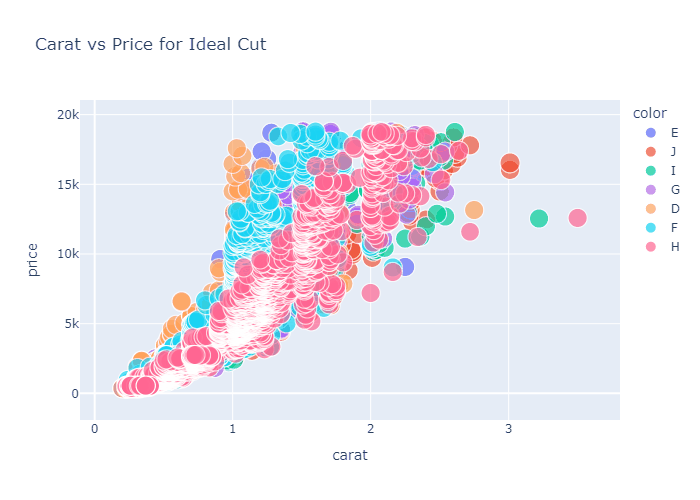

In [6]:
import plotly.express as px
import seaborn as sns
import os
# from moviepy.editor import ImageSequenceClip
# do not use editor command because its not worked
from moviepy import ImageSequenceClip

# Load the diamonds dataset
df = sns.load_dataset('diamonds')

# Check for missing values
if df.isnull().any().any():
    raise ValueError("The dataset contains missing values. Please handle them before plotting.")

# Create a directory to save frames
frames_dir = "frames"
os.makedirs(frames_dir, exist_ok=True)

# Extract unique values for the 'cut' column to iterate over
unique_cuts = df['cut'].unique()

# Save each frame as an image
for i, cut in enumerate(unique_cuts):
    # Filter the data for the current cut
    filtered_df = df[df['cut'] == cut]
    
    # Ensure filtered data is valid
    if filtered_df.empty:
        continue

    # Create the scatter plot for the current cut
    frame_fig = px.scatter(
        filtered_df, x='carat', y='price',
        color='color',
        title=f'Carat vs Price for {cut} Cut',
        size='depth',
        hover_data=['clarity']
    )
    
    # Save the frame image using Kaleido
    frame_filename = os.path.join(frames_dir, f"frame_{i:03d}.png")
    frame_fig.write_image(frame_filename, engine="kaleido")

# Create a GIF or MP4 using moviepy
image_files = [os.path.join(frames_dir, f) for f in sorted(os.listdir(frames_dir)) if f.endswith('.png')]
clip = ImageSequenceClip(image_files, fps=2)  # Adjust fps as needed
clip.write_gif("./03_plotly/animated_plot.gif", fps=2)    # Save as GIF
clip.write_videofile("./03_plotly/animated_plot.mp4", fps=1)  # Save as MP4
# save HD video
clip.write_videofile("./03_plotly/animated_plot_HD.mp4", fps=1, codec="libx264", preset="ultrafast", bitrate="3000k")
# Display the GIF in Jupyter Notebook
from IPython.display import Image
Image("./03_plotly/animated_plot.gif")

## More Plots in Plotly

In [8]:
# scatter plot
fig = px.scatter(df, x='carat', y='price',
                title='Diamond Price vs Carat Weight',
                log_y=True,
                log_x=True,
                )
fig.show()

In [9]:
# Set axes ranges
fig = px.scatter(df, x='carat', y='price', color= 'cut' ,title='Custom Axes Ranges')
fig.update_xaxes(range=[0, 5])
fig.update_yaxes(range=[0, 10000])
fig.show()

In [19]:
# Polar chart using cut as a category
df = sns.load_dataset('diamonds')
df = df.sample(frac=0.1, random_state=10)

In [20]:
df[['carat', 'depth', 'table', 'price']].corr()

carat     depth     table     price
carat  1.000000  0.025077  0.167961  0.921045
depth  0.025077  1.000000 -0.290898 -0.008800
table  0.167961 -0.290898  1.000000  0.116569
price  0.921045 -0.008800  0.116569  1.000000

In [12]:
# Heatmap with annotations

fig = px.imshow(df[['carat', 'depth', 'table', 'price']].corr(), 
                text_auto=True, 
                title='Correlation Heatmap with Annotations')
fig.show() # correlation heatmap

In [13]:
# Sunburst chart with values as price
fig = px.sunburst(df, path=['cut', 'color', 'clarity'], 
                  values='price', 
                  title='Sunburst Chart with Price Values')
fig.show()

In [21]:
from plotly.subplots import make_subplots
# Creating subplots
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=df['carat'], y=df['price'], mode='markers', name='Scatter'), row=1, col=1)
fig.add_trace(go.Box(y=df['price'], name='Box Plot'), row=1, col=2)
fig.update_layout(title_text='Subplots Example')
fig.show()

In [22]:
# scatter plot with dual y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df['carat'], y=df['price'], mode='markers', name='Carat vs Price'), secondary_y=False)
fig.add_trace(go.Scatter(x=df['carat'], y=df['depth'], mode='markers', name='Carat vs Depth'), secondary_y=True)
fig.update_layout(title_text='Scatter Plot with Dual Y-Axes')
# label each y axis
fig.update_yaxes(title_text='Price', secondary_y=False)
fig.update_yaxes(title_text='Depth', secondary_y=True)
fig.show()

In [23]:
# Waterfall chart of price by cut
cut_avg_price = df.groupby('cut')['price'].mean().reset_index()

# Create waterfall chart using plotly.graph_objects
fig = go.Figure(go.Waterfall(
	name="Average Price",
	orientation="v",
	x=cut_avg_price['cut'],
	y=cut_avg_price['price']
))

fig.update_layout(title='Waterfall Chart of Average Price by Cut')
fig.show()

In [24]:
df['clarity'].value_counts().sort_values(ascending=False)

clarity
SI1     1277
VS2     1192
SI2      926
VS1      869
VVS2     493
VVS1     353
IF       184
I1       100
Name: count, dtype: int64

In [25]:
# Funnel chart for clarity distribution
clarity_counts = df['clarity'].value_counts().reset_index()
clarity_counts.columns = ['clarity', 'count']
fig = px.funnel(clarity_counts, x='count', y='clarity', title='Funnel Chart of Clarity Distribution')
fig.show()

In [26]:
# Bullet chart for price distribution
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=df['price'].mean(),
    title={"text": "Average Diamond Price"},
    gauge={"axis": {"range": [0, max(df['price'])]}}
))
fig.show()

In [27]:
# Candlestick chart for price trends (using carat as a time-like variable)
fig = go.Figure(data=[go.Candlestick(
    x=df['carat'], open=df['price'], high=df['price'], low=df['price'], close=df['price']
)])
fig.update_layout(title='Candlestick Chart: Price Trends by Carat')
fig.show()

In [28]:
df = sns.load_dataset('diamonds')
# Ternary plot of carat, depth, and table
fig = px.scatter_ternary(df, a='carat', b='depth', c='table', title='Ternary Plot: Carat, Depth, and Table')
fig.show()

In [29]:
# Stacked area chart of price by cut
df_cut_price = df.groupby(['cut', 'carat'])['price'].mean().reset_index()
fig = px.area(df_cut_price, x='carat', y='price', color='cut', title='Stacked Area Chart of Price by Cut')
fig.show()

-----